## Project Employee Satisfaction
Using Logistic Regression to Identify Factors That Contribute to Employee Satisfaction.

Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code


In [32]:
## Imports 
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
## dataload
data = pd.read_csv('HR-Employee-Attrition.csv')

In [34]:
data.shape

(1470, 35)

In [35]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
data.isna().sum().sum()

0

In [38]:
# Missing values
data.isnull().values.any()


False

In [39]:
# duplicated values
data.duplicated().sum()

0

In [40]:
# target
count_target  = data['Attrition'].value_counts()

In [41]:
#Percent of target
perc_target = data['Attrition'].value_counts(normalize=True)*100
perc_target

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [42]:
tab_target = pd.DataFrame({'Contagem': count_target, 'Percent Target%': perc_target})
tab_target

,Contagem,Percent Target%
Attrition,,
No,1233,83.877551
Yes,237,16.122449


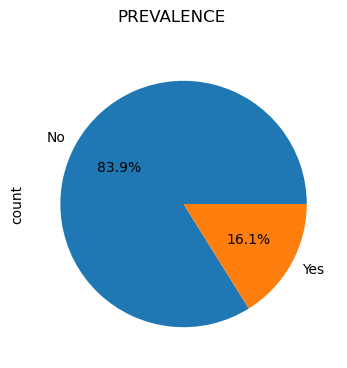

In [43]:
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('PREVALENCE')
data['Attrition'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [44]:
# Encode 
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [45]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [46]:
# Separation
X = data.drop('Attrition', axis= 1)
y = data['Attrition']

In [47]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [48]:
# Category and Numeric
cat_features = X.select_dtypes(include= ['object']).columns.to_list()
num_features = X.select_dtypes(include= ['int64', 'float64']).columns.to_list()

In [49]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [50]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [51]:
# Pipeline numerics
numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())
])

In [52]:
# Pipeline categoric
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
# Pre-process
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [54]:
# Model Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])


In [55]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'Mon...
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [56]:
# predict
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8945578231292517

In [58]:
# Coeficients
coefficients = model.named_steps['classifier'].coef_[0]

In [59]:
features_names = num_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))

In [60]:
features_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'Jo

In [61]:
coeff_data = pd.DataFrame({'Atribut': features_names, 'Coefficient': coefficients}).sort_values(by= 'Coefficient', ascending=False)

In [62]:
coeff_data.head(10)

,Atribut,Coefficient
54,OverTime_Yes,1.039938
42,JobRole_Laboratory Technician,1.020678
27,BusinessTravel_Travel_Frequently,0.830317
48,JobRole_Sales Representative,0.784274
51,MaritalStatus_Single,0.735787
22,YearsAtCompany,0.663086
37,EducationField_Technical Degree,0.627767
24,YearsSinceLastPromotion,0.502098
13,NumCompaniesWorked,0.501348
41,JobRole_Human Resources,0.460598


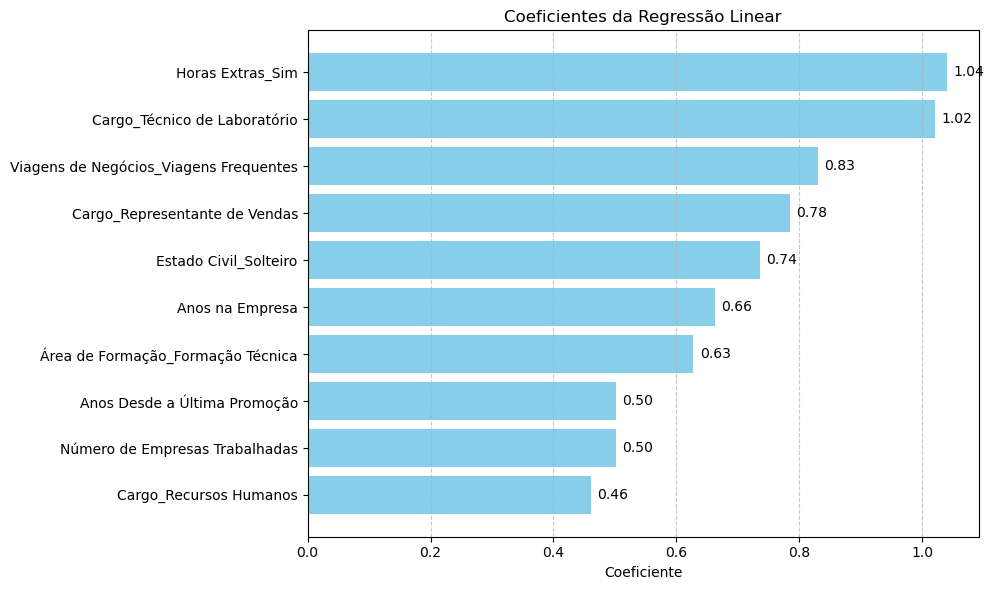

In [64]:
# plot
import matplotlib.pyplot as plt
import pandas as pd

# Dados da regressão
data = {
    'Atributo': [
        'Horas Extras_Sim', 'Cargo_Técnico de Laboratório', 'Viagens de Negócios_Viagens Frequentes',
'Cargo_Representante de Vendas', 'Estado Civil_Solteiro', 'Anos na Empresa',
'Área de Formação_Formação Técnica', 'Anos Desde a Última Promoção',
'Número de Empresas Trabalhadas', 'Cargo_Recursos Humanos'
    ],
    'Coeficiente': [
        1.039938, 1.020678, 0.830317, 0.784274, 0.735787,
        0.663086, 0.627767, 0.502098, 0.501348, 0.460598
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Ordenar por coeficiente
df_sorted = df.sort_values(by='Coeficiente', ascending=True)

# Plotar
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Atributo'], df_sorted['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Coeficientes da Regressão Linear')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adiciona os valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()


#### Conclusão

##### Os coeficientes na regressão logística indicam a força e a direção da associação entre cada característica (atributo) e a probabilidade de ocorrência do evento-alvo, que neste caso é a demissão voluntária (Attrition).

***10 Principais Coeficientes:***

1. **HorasExtras_Sim 1,039938**

Uma distância maior de casa para o trabalho está associada a uma maior probabilidade de demissão voluntária. Longos deslocamentos podem causar burnout e insatisfação.
2. **Função_Técnico_de_Laboratório 1,020678**

Funcionários que trabalham como técnicos de laboratório têm maior probabilidade de pedir demissão voluntariamente. Isso pode indicar insatisfação com a função específica ou com o ambiente de trabalho.
3. **Viagens_Negócios_Viagens_Frequentes 0,830317**

Funcionários que viajam frequentemente a negócios têm maior probabilidade de pedir demissão voluntariamente. Este coeficiente é bastante significativo, sugerindo que a frequência de viagens pode ser um fator de estresse ou insatisfação.

4. **JobRole_Sales Representative 0,784274**

Funcionários que trabalham como representantes de vendas têm maior probabilidade de pedir demissão voluntariamente. Essa função pode ter alta pressão de desempenho ou falta de suporte adequado.

5. **MaritalStatus_Single 0,735787**

Funcionários solteiros têm maior probabilidade de pedir demissão voluntariamente em comparação com funcionários casados ou em outros estados civis. Isso pode ser devido à maior flexibilidade e à redução de responsabilidades pessoais.

6. **YearsAtCompany 0,663086**

Quanto mais anos um funcionário passou na empresa, maior a probabilidade de pedir demissão voluntariamente. Isso pode indicar que, após um certo período, os funcionários podem se sentir estagnados ou buscar novas oportunidades.

7. **EducationField_Technical Degree 0,627767**

Funcionários com formação técnica têm maior probabilidade de pedir demissão voluntariamente em comparação com aqueles com outras formações. Isso pode indicar que esses funcionários têm mais oportunidades no mercado de trabalho ou que suas expectativas não estão sendo atendidas.

8. **YearsSinceLastPromotion 0,502098**

Funcionários que passaram mais anos desde a última promoção têm maior probabilidade de pedir demissão voluntariamente. Isso pode indicar insatisfação com as oportunidades de crescimento dentro da empresa.

9. **NumCompaniesWorked 0,501348**

Funcionários que trabalharam para um número maior de empresas ao longo da carreira têm maior probabilidade de pedir demissão voluntariamente.

10. **JobRole_Human Resources 0,460598**

Funcionários que trabalham como recursos humanos têm maior probabilidade de pedir demissão voluntariamente. Essa função pode apresentar alta pressão de desempenho ou falta de suporte adequado.

Em outras palavras, analisar os coeficientes de um modelo de regressão logística nos ajuda a entender a influência de cada atributo na probabilidade do evento de interesse. Coeficientes positivos indicam que, à medida que o valor do atributo aumenta, a probabilidade de o funcionário pedir demissão voluntariamente também aumenta.